In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import os as os

# READING THE DATA

In [3]:
os.chdir("H:\\Mtech 3rd sem\\NLP")
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data.head()

In [6]:
df1= data[['reviews.rating','reviews.text']]

# PRE-PROCESSING

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["reviews.rating"] = le.fit_transform(df1["reviews.rating"])
df1.head()

C:\Users\Asra Iqbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
corpus = df1["reviews.text"].tolist()
corpus

In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.corpus import stopwords
from string import punctuation
import nltk

In [16]:
stemmer = LancasterStemmer()
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)

final_corpus=[]
for x in range(len(corpus)):
    text = word_tokenize(corpus[x].lower())
    text = [lancaster_stemmer.stem(y) for y in text if y not in stuff_to_be_removed]
    sent = " ".join(text)
#     print(sent)
    final_corpus.append(sent)

In [17]:
new_df = pd.DataFrame(final_corpus)
new_df['reviews.rating']=df1['reviews.rating']
new_df.columns= ['review', 'rating']
new_df.head(5)

In [19]:
corpus_1=new_df['review'].tolist()
corpus_1[0]

# EXTRACTING THE ADJECTIVES

In [80]:
final_adj=[]
final_adjcount=[]
for x in range(len(corpus_1)):
    text = word_tokenize(corpus[x].lower())
    text1 = [lancaster_stemmer.stem(y) for y in text if y not in stuff_to_be_removed]
    text2 = [x[0] for x in nltk.pos_tag(text1) if x[1]=='JJ']
    text3 = " ".join(text2)
    final_adjcount.append(text2)
    final_adj.append(text3)
final_adj[0]

'big smal lik smal'

In [81]:
adj= pd.DataFrame(final_adj)
adj.head(2)

,0
0,big smal lik smal
1,easy
2,low happy
3,happy sal real good real old extrem giant nee ...
4,solid ipad good high bet


In [102]:
adj_list=adj[0].tolist()
adj_list

In [41]:
from collections import Counter

In [48]:
list_adjcount=[]
for i in range (len(final_adjcount)):
    counts = dict()
    words = final_adjcount[i]
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    list_adjcount.append(counts)

In [73]:
count= pd.DataFrame(pd.Series(list_adjcount), columns=['count'])

,count
0,"{'big': 1, 'smal': 2, 'lik': 1}"
1,{'easy': 1}
2,"{'low': 1, 'happy': 1}"
3,"{'happy': 1, 'sal': 1, 'real': 2, 'good': 1, '..."
4,"{'solid': 1, 'ipad': 1, 'good': 1, 'high': 1, ..."


In [89]:
new_df['count']=count['count']
new_df['adjectives']=adj[0]
new_df=new_df.drop(['rating'], axis=1)
new_df.head(3)

,review,count,adjectives
0,thought would big smal pap turn lik palm think...,"{'big': 1, 'smal': 2, 'lik': 1}",big smal lik smal
1,kindl light easy us espec beach,{'easy': 1},easy
2,didnt know much 'd us kindl went low end im ha...,"{'low': 1, 'happy': 1}",low happy



# Sentiment Analysis using TextBlob on Adjectives 

In [90]:
from textblob import TextBlob

In [110]:
sentiment=[]
for i in range(len(adj_list)):
    blob = TextBlob(adj_list[i])
    sentimen=blob.sentiment
    sentiment.append(sentimen)
    

In [112]:
sentiment=pd.DataFrame(sentiment)
sentiment.head(3)

,polarity,subjectivity
0,0.000000,0.100000
1,0.433333,0.833333
2,0.400000,0.650000


In [113]:
new_df['polarity']=sentiment['polarity']
new_df['subjectivity']=sentiment['subjectivity']
new_df.head(2)

,review,count,adjectives,polarity,subjectivity
0,thought would big smal pap turn lik palm think...,"{'big': 1, 'smal': 2, 'lik': 1}",big smal lik smal,0.000000,0.100000
1,kindl light easy us espec beach,{'easy': 1},easy,0.433333,0.833333


# wordcloud

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

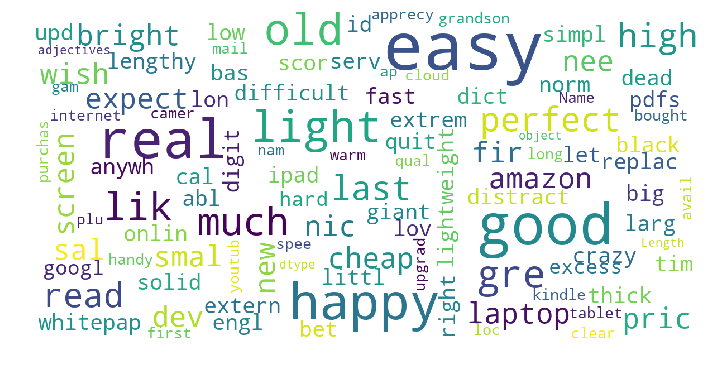

In [115]:
show_wordcloud(new_df['adjectives'])